In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [7]:
  # useful for getting number of output classes
folders = glob('train/*')

In [8]:
folders

['train\\degree0', 'train\\degree1', 'train\\degree2']

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 920 images belonging to 3 classes.


In [14]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('C:/Users/Madhur/Desktop/Skin burn analysis (Hackathon)/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 540 images belonging to 3 classes.


In [17]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Madhur\AppData\Local\Temp\ipykernel_12352\4008731854.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
29/29 [==============================] - 288s 10s/step - loss: 1.2238 - accuracy: 0.5098 - val_loss: 0.7657 - val_accuracy: 0.6630
Epoch 2/50
29/29 [==============================] - 257s 9s/step - loss: 0.7676 - accuracy: 0.6620 - val_loss: 0.5898 - val_accuracy: 0.7500
Epoch 3/50
29/29 [==============================] - 251s 9s/step - loss: 0.6356 - accuracy: 0.7293 - val_loss: 0.4651 - val_accuracy: 0.8130
Epoch 4/50
29/29 [==============================] - 299s 10s/step - loss: 0.5479 - accuracy: 0.7750 - val_loss: 0.3971 - val_accuracy: 0.8574
Epoch 5/50
29/29 [==============================] - 268s 9s/step - loss: 0.4990 - accuracy: 0.8054 - val_loss: 0.3662 - val_accuracy: 0.8796
Epoch 6/50
29/29 [==============================] - 247s 9s/step - loss: 0.4725 - accuracy: 0.8033 - val_loss: 0.3671 - val_accuracy: 0.8759
Epoch 7/50
29/29 [==============================] - 245s 9s/step - loss: 0.4210 - accuracy: 0.8380 - val_loss: 0.2960 - val_accuracy: 0.9056
Epoch 8/50


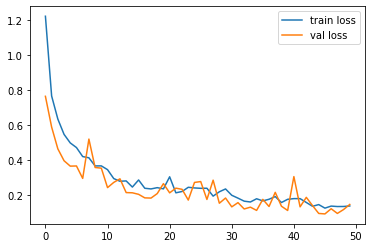

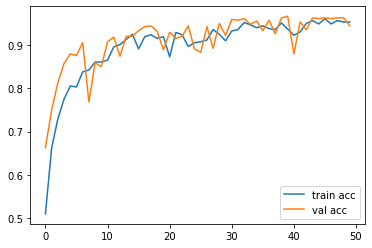

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
model.save("vgg19_model.hdf5")